In [ ]:
import tensorflow as tf
import numpy as np

## This Fashion MNIST dataset included in Tensorflow Library

In [ ]:
fas_mnist=tf.keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fas_mnist.load_data()

In [ ]:
train_images=train_images.reshape(60000, 28, 28, 1)
train_images=train_images / 255.0 #Standardising
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0 #Standardising

In [ ]:
train_images.shape

(60000, 28, 28, 1)

In [ ]:
test_images.shape

(10000, 28, 28, 1)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(256, (3,3), activation='relu', input_shape=(28, 28, 1)), # Here 256 feature detector are used, normally 64 is enough
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu',input_shape=(28, 28, )),
  tf.keras.layers.Dense(10, activation='softmax')
])



In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 256)       2560      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 256)       590080    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 256)         0         
_________________________________________________________________
flatten_15 (Flatten)         (None, 6400)              0         
_________________________________________________________________
dense_34 (Dense)             (None, 128)               819328    
_________________________________________________________________
dense_35 (Dense)             (None, 10)              

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4067 - accuracy: 0.8511
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2713 - accuracy: 0.9005
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2232 - accuracy: 0.9171
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1872 - accuracy: 0.9299
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1565 - accuracy: 0.9411
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1326 - accuracy: 0.9495
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1103 - accuracy: 0.9582
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0934 - accuracy: 0.9650
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0784 - accuracy: 0.9702
Epoch 10/10
1875/1875 [==============================] - 15s 8ms/step - l

In [ ]:
model.predict(test_images)

array([[1.1029521e-18, 6.5646397e-17, 1.7393483e-19, ..., 1.9713989e-11,
        1.4540696e-16, 1.0000000e+00],
       [1.7050345e-21, 6.2688380e-36, 1.0000000e+00, ..., 1.8300846e-23,
        6.0515955e-18, 1.9599519e-23],
       [8.6132086e-16, 1.0000000e+00, 3.6016917e-28, ..., 9.0305284e-38,
        1.5228318e-20, 3.6050263e-31],
       ...,
       [4.0323531e-26, 0.0000000e+00, 2.2220475e-27, ..., 7.4752829e-27,
        1.0000000e+00, 1.2659316e-32],
       [3.6075584e-23, 1.0000000e+00, 7.2779411e-30, ..., 0.0000000e+00,
        4.7284093e-30, 1.0267617e-36],
       [2.2100562e-07, 3.9192289e-20, 6.3945610e-10, ..., 3.0395756e-07,
        4.3196211e-09, 2.3322205e-10]], dtype=float32)

In [ ]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.3429 - accuracy: 0.9130


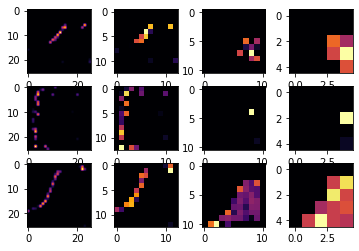

In [ ]:
# Seeing some convulation layer effect on different images
# This is optional
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=9299
CONVOLUTION_NUMBER = 210
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)